<a href="https://colab.research.google.com/github/HadeelAbdAl-majeed/advertising/blob/main/advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv("/content/advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [ ]:
data['Daily Internet Usage'].mean()

180.0001

In [ ]:
data['Daily Time Spent on Site'].mean()

65.0002

In [ ]:
(65.002/180.0001)*100

36.11220215988769

In [ ]:
data['Area Income'].mean()

55000.000080000005

In [ ]:
data['Male'].mean()

0.481

In [ ]:
data["Age"].mean()

36.009

In [ ]:
data.groupby(['Male'])[['Clicked on Ad']].mean()

,Clicked on Ad
Male,
0,0.518304
1,0.480249


In [ ]:
data['Month'] = data['Timestamp'].apply(lambda x: x.split("-")[1])

In [ ]:
data['Month'].value_counts()

02    160
03    156
04    147
01    147
05    147
06    142
07    101
Name: Month, dtype: int64

In [ ]:
data['Years'] = data['Timestamp'].apply(lambda x: x.split("-")[0])

In [ ]:
data['Years'].value_counts()

2016    1000
Name: Years, dtype: int64

In [ ]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Month', 'Years'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
 10  Month                     1000 non-null   object 
 11  Years                     1000 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB


In [ ]:
data_spendtime=data.groupby(['Month'])[['Daily Time Spent on Site','Daily Internet Usage']].mean()
data_spendtime

,Daily Time Spent on Site,Daily Internet Usage
Month,,
01,65.199796,184.190204
02,65.786188,175.675125
03,64.428782,177.544679
04,65.658844,180.798095
05,64.045306,178.877823
06,64.121761,178.542394
07,66.013366,187.067030


In [ ]:
country_clicked = data.groupby('Country')['Clicked on Ad'].sum()

# Taking the top 10 countries based on the total ad access
top_10_countries = country_clicked.sort_values(ascending=False).head(10)

print("Top 10 countries by total ad access:")
print(top_10_countries)

Top 10 countries by total ad access:
Country
Australia        7
Turkey           7
Ethiopia         7
Liberia          6
South Africa     6
Liechtenstein    6
Senegal          5
Peru             5
Mayotte          5
Hungary          5
Name: Clicked on Ad, dtype: int64


In [ ]:
country_used= data.groupby('Country')['Daily Time Spent on Site'].sum()

# Taking the top 10 countries based on the total ad access
top_10_countries_used = country_used.sort_values(ascending=False).head(10)

print("Top 10 countries by total ad access:")
print(top_10_countries_used)

Top 10 countries by total ad access:
Country
Greece                    576.63
France                    570.88
Czech Republic            553.81
Senegal                   523.19
Afghanistan               518.26
Cyprus                    517.58
Australia                 502.69
Bosnia and Herzegovina    498.38
Fiji                      488.86
Burundi                   484.80
Name: Daily Time Spent on Site, dtype: float64


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
Month                       0
Years                       0
dtype: int64

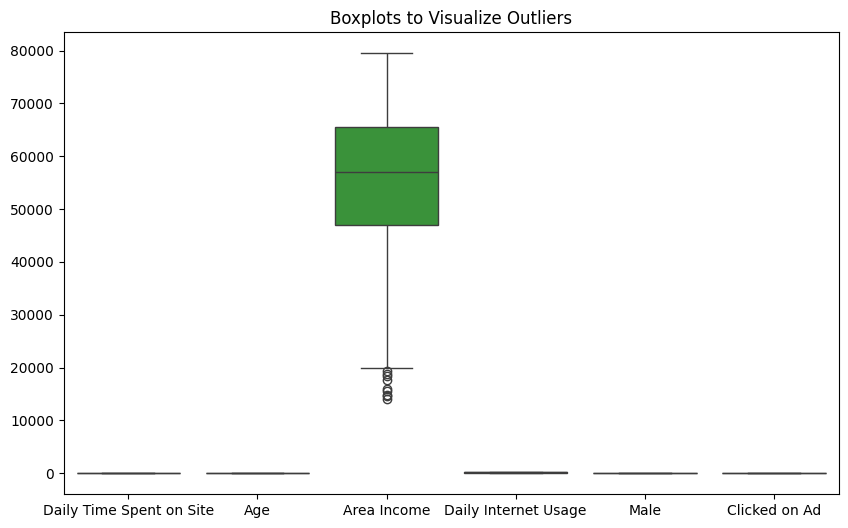

In [ ]:
df = pd.DataFrame(data)

# Drawing boxplots to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)

# Customize plot appearance
plt.title('Boxplots to Visualize Outliers')
plt.show()

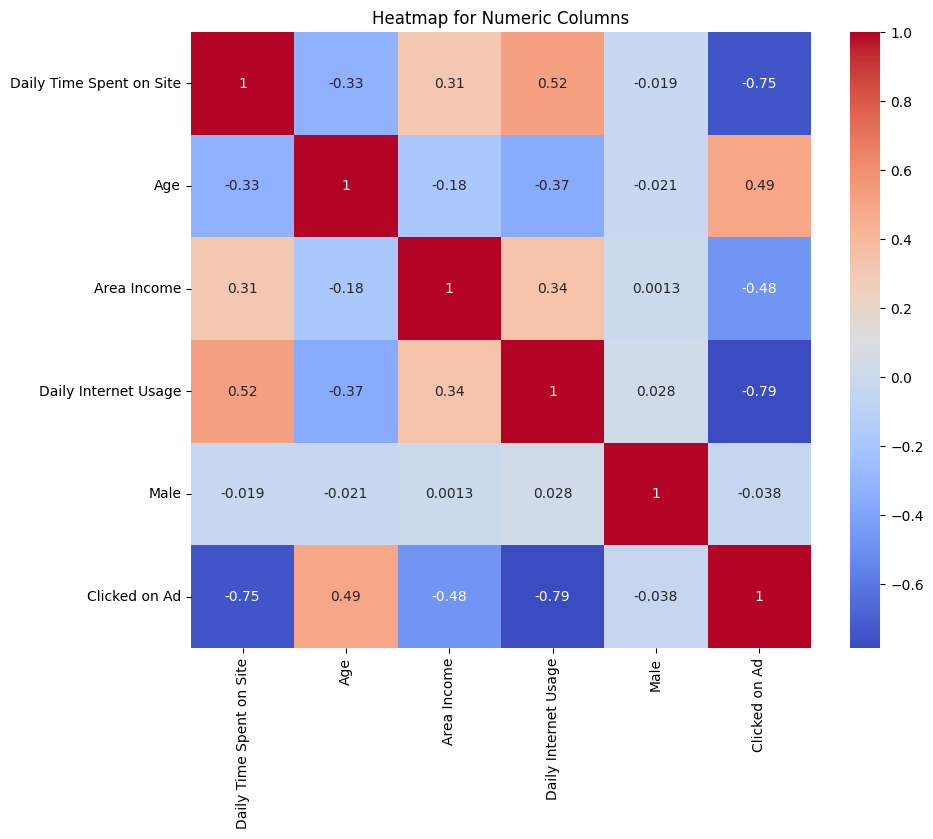

In [ ]:
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')

# Customize plot appearance
plt.title('Heatmap for Numeric Columns')
plt.show()

<ipython-input-28-570b6368f4c2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Daily Time Spent on Site', data=data_spendtime,  palette='viridis')


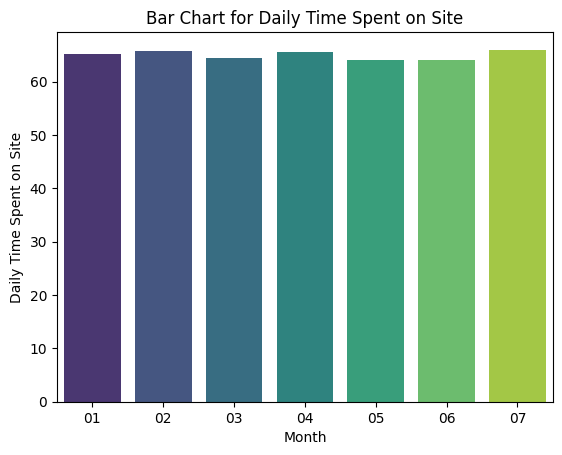

In [ ]:
sns.barplot(x='Month', y='Daily Time Spent on Site', data=data_spendtime,  palette='viridis')
plt.title('Bar Chart for Daily Time Spent on Site')
plt.show()

Insight

  - The data was for the year 2016 and includes the first 7 months of the year.
  - The rate of access to the site varied according to the months.

<ipython-input-29-cb315f2cf64a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Daily Internet Usage', data=data_spendtime, palette='viridis')


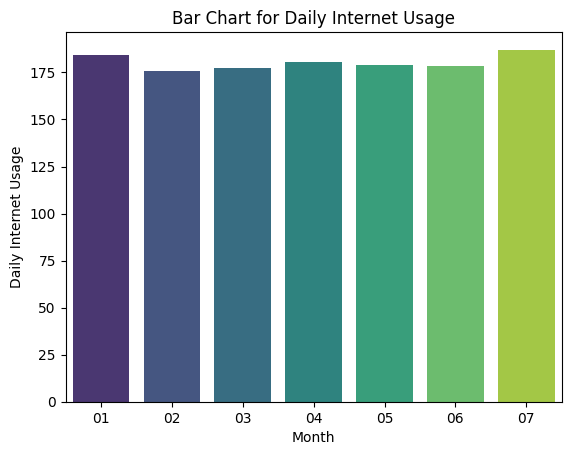

In [ ]:
sns.barplot(x='Month', y='Daily Internet Usage', data=data_spendtime, palette='viridis')
plt.title('Bar Chart for Daily Internet Usage')
plt.show()

Insight

   - The rate of access to the Daily Internet Usage varied according to the months.

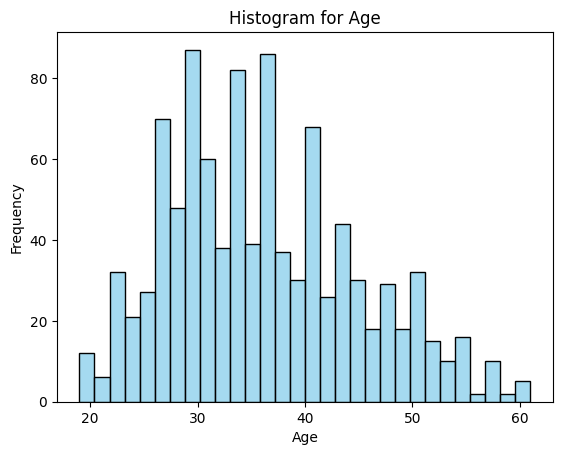

In [ ]:
sns.histplot(data['Age'], bins=30, color='skyblue')
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Insight
    
 - The ages of people using and interested in the site were from 19-60 years.

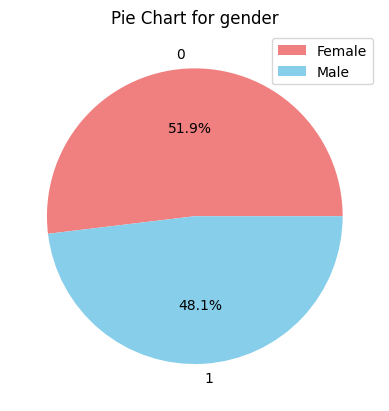

In [ ]:
Male_counts = data['Male'].value_counts()

plt.pie(Male_counts ,labels=Male_counts.index, autopct='%1.1f%%', colors=[ 'lightcoral', 'skyblue'])
plt.title('Pie Chart for gender')
plt.legend(['Female','Male'], loc='upper right')
plt.show()

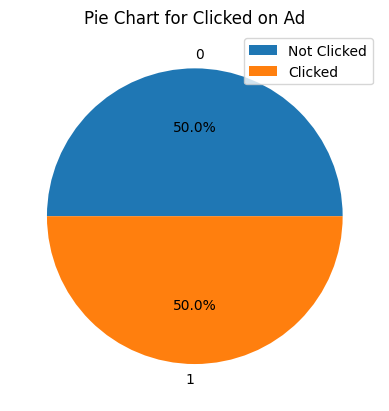

In [ ]:
Clicked_counts = data['Clicked on Ad'].value_counts()

plt.pie(Clicked_counts ,labels=Clicked_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart for Clicked on Ad')
plt.legend(['Not Clicked','Clicked'], loc='upper right')
plt.show()

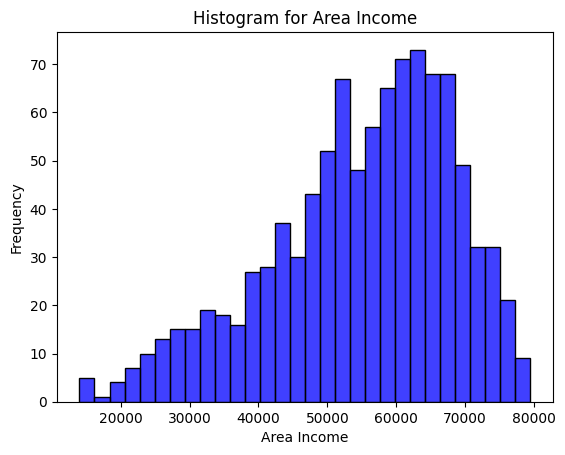

In [ ]:
sns.histplot(data['Area Income'], bins=30, color='blue')
plt.title('Histogram for Area Income')
plt.xlabel('Area Income')
plt.ylabel('Frequency')
plt.show()

<ipython-input-7-3fa12dabdeb7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis')


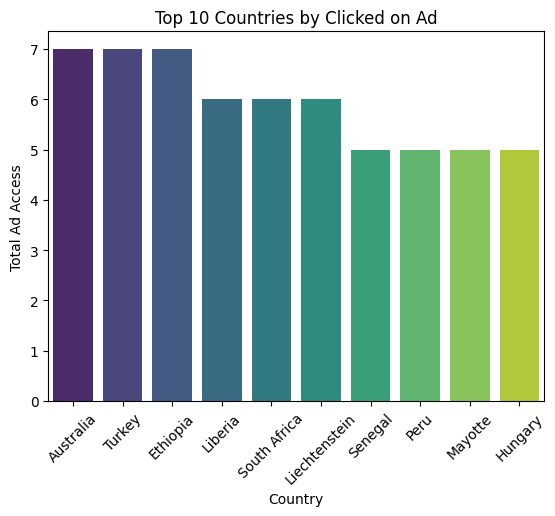

In [ ]:

sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis')

# Customize plot appearance
plt.title('Top 10 Countries by Clicked on Ad')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Total Ad Access')

plt.show()

<ipython-input-12-2f3cb10b6733>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries_used.index, y=top_10_countries_used.values, palette='viridis')


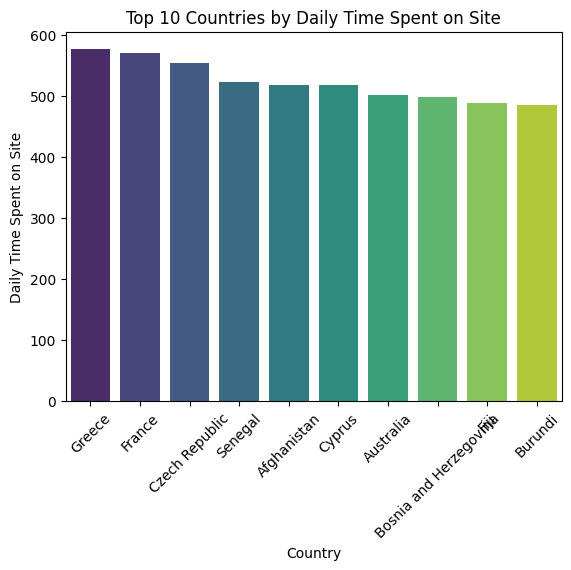

In [ ]:
sns.barplot(x=top_10_countries_used.index, y=top_10_countries_used.values, palette='viridis')

# Customize plot appearance
plt.title('Top 10 Countries by Daily Time Spent on Site')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Daily Time Spent on Site')

plt.show()

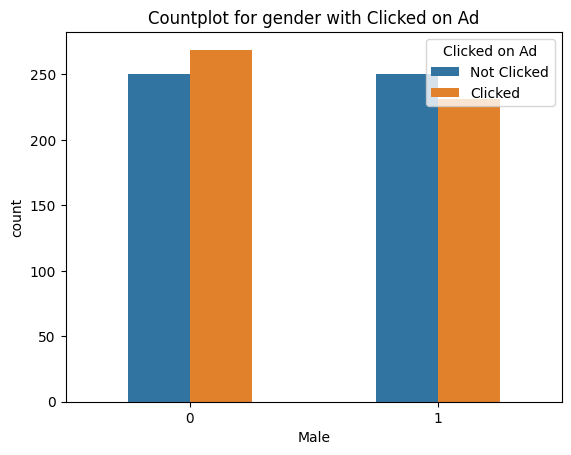

In [ ]:
sns.countplot(x='Male', hue='Clicked on Ad', data=data , width=0.5 )
plt.legend(title='Clicked on Ad', labels={'Not Clicked':0, 'Clicked':1})
plt.xticks(rotation=1)
plt.title('Countplot for gender with Clicked on Ad')
plt.show()

Insight
  - The percentage of females who clicked on ads was higher than males.


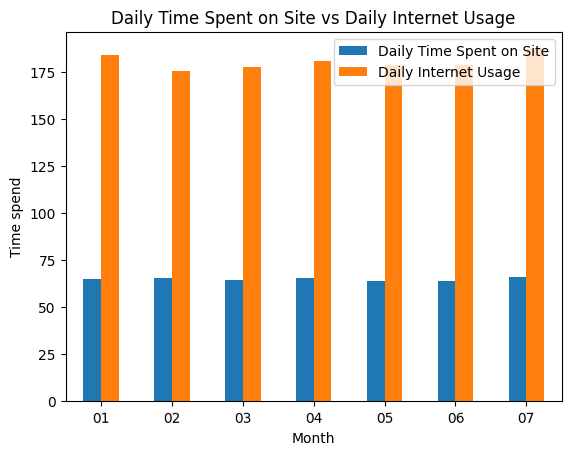

In [ ]:
data_spendtime.plot(kind='bar', width=0.5)
plt.title('Daily Time Spent on Site vs Daily Internet Usage')
plt.xlabel('Month')
plt.ylabel('Time spend')
plt.xticks(rotation=1)
plt.show()


Insight
 - The time that people spend on the site is 36% of the time they spend on the Internet.

Report:

Through the data we obtain some information

  - The data was for the year 2016 and includes the first 7 months of the year.
  - The time that people spend on the site is 36% of the time they spend on the Internet.
  - Clicked rate on ads within the site is 50%.
  -The percentage of females who clicked on ads was higher than males.
  - The rate of access to the site varied according to the months.
  -The ages of people using and interested in the site were from 19-60 years.
